In [1]:
# Load contents of the raw EEG time-series data

from scipy.io import loadmat
data = loadmat('Matlab/eeg_data.mat')

In [2]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'eeg_data'])

In [3]:
eeg_data = data['eeg_data']
print(eeg_data.shape) # 1 trial epoch, 24 channels, 724638 time samples

(24, 724638)


In [4]:
# Load channel information

channels = loadmat('Matlab/channel_names.mat')
channels.keys()

dict_keys(['__header__', '__version__', '__globals__', 'channelNames'])

In [5]:
channel_names = channels['channelNames']
print(channel_names) # 24 channels

[[array(['Fp1'], dtype='<U3') array(['Fp2'], dtype='<U3')
  array(['F3'], dtype='<U2') array(['F4'], dtype='<U2')
  array(['C3'], dtype='<U2') array(['C4'], dtype='<U2')
  array(['P3'], dtype='<U2') array(['P4'], dtype='<U2')
  array(['O1'], dtype='<U2') array(['O2'], dtype='<U2')
  array(['F7'], dtype='<U2') array(['F8'], dtype='<U2')
  array(['FC3'], dtype='<U3') array(['FC4'], dtype='<U3')
  array(['P7'], dtype='<U2') array(['P8'], dtype='<U2')
  array(['Fz'], dtype='<U2') array(['Cz'], dtype='<U2')
  array(['Pz'], dtype='<U2') array(['FCz'], dtype='<U3')
  array(['Oz'], dtype='<U2') array(['AFz'], dtype='<U3')
  array(['CPz'], dtype='<U3') array(['POz'], dtype='<U3')]]


In [6]:
# Cz channel visualiztion before processing epochs

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Cz = eeg_data[17] # Cz channel

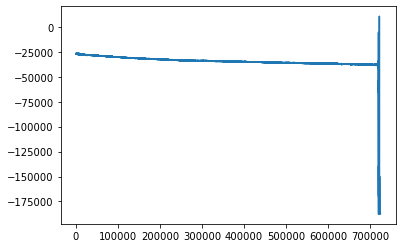

In [7]:
x = np.arange(1, 724639)
y = Cz
plt.plot(x, y, label='1st epoch')
plt.show()

In [29]:
# Last 5,000 time samples only

Cz_subset = eeg_data[17][-5000:]
len(Cz_subset)

5000

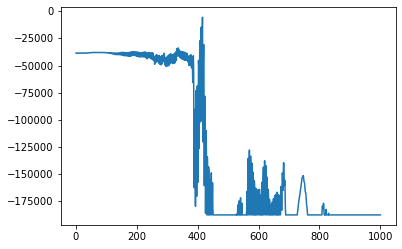

In [37]:
x = np.arange(1, 1001)
y = Cz_subset[:1000]
plt.plot(x, y, label='1st epoch subset')
plt.show()

In [10]:
# Pre-processing for each epoch

from process import *
from parameters import *

In [11]:
# Processing without channel projection

num_trials = 1
epochs = []
for i in range(num_trials):
    eeg = eeg_data
    epoch = preproc1epoch(eeg)
    # print(epoch.shape)
    epochs.append(epoch)

No gradiometers found. Forcing n_grad to 0
No magnetometers found. Forcing n_mag to 0
Adding projection: eeg-1--0.100-7246.270-PCA-01
Adding projection: eeg-1--0.100-7246.270-PCA-02
Adding projection: eeg-1--0.100-7246.270-PCA-03
Adding projection: eeg-1--0.100-7246.270-PCA-04
Adding projection: eeg-1--0.100-7246.270-PCA-05
1 projection items deactivated
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
(24, 724638)


In [12]:
print(len(epochs))
print(epochs[0].shape)

1
(24, 724638)


In [13]:
# Plot after preocessing

Cz_ = epochs[0][17] # Cz = 18th channel
len(Cz_)

724638

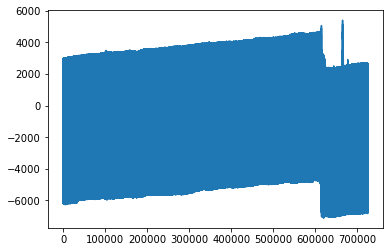

In [14]:
x = np.arange(1, 724639)
y = Cz_
plt.plot(x, y, label='1st epoch')
plt.show()

In [35]:
# Last 5,000 time samples only

Cz_subset_ = epochs[0][17][-5000:]
len(Cz_subset_)

5000

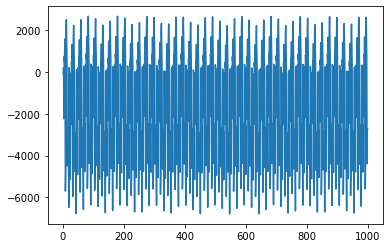

In [38]:
x = np.arange(1, 1001)
y = Cz_subset_[:1000]
plt.plot(x, y, label='1st epoch subset')
plt.show()